In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/ML_and_DL_Learning/diabetes_prediction_dataset.csv")

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
le = preprocessing.LabelEncoder()
df['gender']=le.fit_transform(df['gender'])

In [6]:
df["smoking_history"].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [7]:
def encode(x):
    if x == "No Info":
        return 0
    elif x == "never":
        return 1
    elif x == "former":
        return 2
    elif x == "current":
        return 3
    elif x == "not current":
        return 4
    else:
        return 5

In [8]:
df["smonking_encode"] = df.apply(lambda x: encode(x["smoking_history"]), axis = 1)

In [9]:
df.drop('smoking_history', axis=1, inplace=True)

In [10]:
df.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smonking_encode
0,0,80.0,0,1,25.19,6.6,140,0,1
1,0,54.0,0,0,27.32,6.6,80,0,0
2,1,28.0,0,0,27.32,5.7,158,0,1
3,0,36.0,0,0,23.45,5.0,155,0,3
4,1,76.0,1,1,20.14,4.8,155,0,3


In [11]:
from sklearn.preprocessing import StandardScaler
df_45 = df[df["age"] >= 45]
diabetes = df_45['diabetes']

df_45 = df_45.drop('diabetes', axis=1)

scaler = StandardScaler()
df_45 = scaler.fit_transform(df_45)

df_45 = pd.DataFrame(df_45, columns=df.columns[:-1])
df_45['diabetes'] = diabetes

In [12]:
df_45 = df_45.dropna()
X = df_45.drop("diabetes", axis=1)
y = df_45["diabetes"]

from sklearn.model_selection import train_test_split

X_train, X_Test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [13]:
df.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smonking_encode
0,0,80.0,0,1,25.19,6.6,140,0,1
1,0,54.0,0,0,27.32,6.6,80,0,0
2,1,28.0,0,0,27.32,5.7,158,0,1
3,0,36.0,0,0,23.45,5.0,155,0,3
4,1,76.0,1,1,20.14,4.8,155,0,3


In [14]:
df_45.drop("diabetes", axis=1,inplace=True)

In [15]:
df_45.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,-0.841762,1.634286,-0.401645,3.390371,-0.645939,0.848778,-0.056826
1,-0.841762,-0.703759,-0.401645,-0.294953,-0.283799,0.848778,-1.393736
4,-0.841762,-0.793684,-0.401645,-0.294953,-0.283799,0.408064,-1.282327
7,-0.841762,0.465263,-0.401645,-0.294953,-0.560929,0.143636,1.280084
10,-0.841762,0.645113,-0.401645,-0.294953,-1.317513,-0.737792,-1.282327


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier().fit(X_train, y_train)
rf_pred = rf_model.predict(X_Test)

print("RF Accuracy Rate: ", accuracy_score(y_test, rf_pred)*100)
print("RF Precision Rate: ", precision_score(y_test, rf_pred)*100)
print("RF Recall Rate: ", recall_score(y_test, rf_pred)*100)
print("RF F1 Score Rate: ", f1_score(y_test, rf_pred)*100)

RF Accuracy Rate:  83.0343300110742
RF Precision Rate:  21.686746987951807
RF Recall Rate:  2.5034770514603615
RF F1 Score Rate:  4.488778054862842


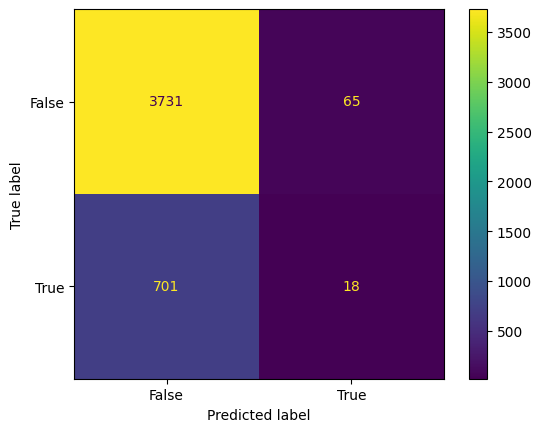

In [18]:
rf_cm = metrics.confusion_matrix(y_test, rf_pred)
rf_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = rf_cm, display_labels = [False, True])

rf_cm_display.plot()
plt.show()

In [19]:
rf_params = {'bootstrap': [True],
    'max_depth': [6,5,4],
    'n_jobs' : [0.5, 1, 2 ,3],
    'n_estimators': [500, 600, 750, 1000]}
rf_gridcv_model = GridSearchCV(estimator=rf_model, param_grid=rf_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)
print("best params of random forest grid search model: ",rf_gridcv_model.best_params_)
print('rf gridcv model accuracy score = {}'.format(rf_gridcv_model.best_score_))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


KeyboardInterrupt: ignored

In [20]:
from sklearn.tree import DecisionTreeClassifier

dectree_model = DecisionTreeClassifier().fit(X_train, y_train)

dectree_pred = dectree_model.predict(X_Test)

print("DTREE Accuracy Rate: ", accuracy_score(y_test, dectree_pred)*100)
print("DTREE Precision Rate: ", precision_score(y_test, dectree_pred)*100)
print("DTREE Recall Rate: ", recall_score(y_test, dectree_pred)*100)
print("DTREE F1 Score Rate: ", f1_score(y_test, dectree_pred)*100)

DTREE Accuracy Rate:  72.75747508305648
DTREE Precision Rate:  14.855570839064649
DTREE Recall Rate:  15.02086230876217
DTREE F1 Score Rate:  14.937759336099585


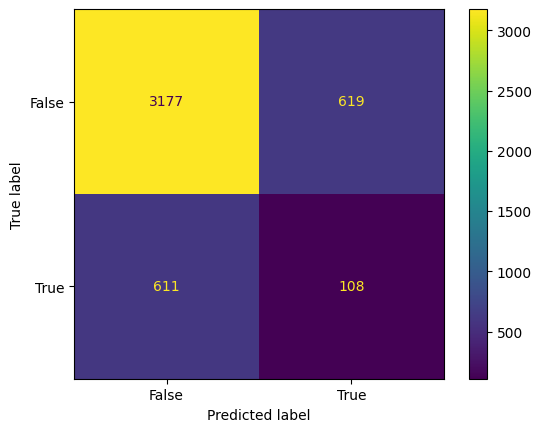

In [21]:
dectree_cm = metrics.confusion_matrix(y_test, dectree_pred)
dectree_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = dectree_cm, display_labels = [False, True])

dectree_cm_display.plot()
plt.show()

In [ ]:
dt_params = {
    'max_depth' : [3, 10, 20, 50],
    'min_samples_leaf' : [1, 5, 7]}
dt_gridcv_model = GridSearchCV(estimator=dectree_model, param_grid=dt_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)
print("best params of decision tree grid search model: {}".format(dt_gridcv_model.best_params_))
print('Decision Tree gridcv model accuracy score = {}'.format(dt_gridcv_model.best_score_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
best params of decision tree grid search model: {'max_depth': 3, 'min_samples_leaf': 1}
Decision Tree gridcv model accuracy score = 0.8419070804018606


In [22]:
from sklearn import svm
svm_model= svm.SVC(kernel='poly',degree=3,gamma='auto').fit(X_train,y_train)

svm_pred=svm_model.predict(X_Test)

print("SVM Accuracy Rate: ", accuracy_score(y_test, svm_pred)*100)
print("SVM Precision Rate: ", precision_score(y_test, svm_pred)*100)
print("SVM Recall Rate: ", recall_score(y_test, svm_pred)*100)
print("SVM F1 Score Rate: ", f1_score(y_test, svm_pred)*100)

SVM Accuracy Rate:  84.07530454042082
SVM Precision Rate:  0.0
SVM Recall Rate:  0.0
SVM F1 Score Rate:  0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


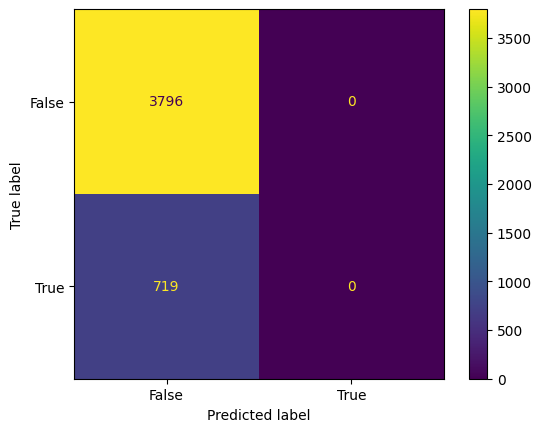

In [23]:
svm_cm = metrics.confusion_matrix(y_test, svm_pred)
svm_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = svm_cm, display_labels = [False, True])

svm_cm_display.plot()
plt.show()

In [ ]:
svm_params = [
{'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
{'C':  [0.1, 1, 10, 100], 'gamma':  [0.1, 1, 10, 100], 'kernel': ['rbf']}
]
svm_gridcv_model = GridSearchCV(estimator=svm_model, param_grid=svm_params, cv=10, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)
print("best params of support vector machine grid search model: {}".format(svm_gridcv_model.best_params_))
print('svm gridcv model accuracy score = {}'.format(svm_gridcv_model.best_score_))

Fitting 10 folds for each of 20 candidates, totalling 200 fits


KeyboardInterrupt: ignored

In [24]:
from sklearn.naive_bayes import GaussianNB

naiveB_model = GaussianNB().fit(X_train, y_train)
naiveBpred = naiveB_model.predict(X_Test)

print("NaiveBayes Accuracy Rate: ", accuracy_score(y_test, naiveBpred)*100)
print("NaiveBayes Precision Rate: ", precision_score(y_test, naiveBpred)*100)
print("NaiveBayes Recall Rate: ", recall_score(y_test, naiveBpred)*100)
print("NaiveBayes F1 Score Rate: ", f1_score(y_test, naiveBpred)*100)

NaiveBayes Accuracy Rate:  84.07530454042082
NaiveBayes Precision Rate:  0.0
NaiveBayes Recall Rate:  0.0
NaiveBayes F1 Score Rate:  0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


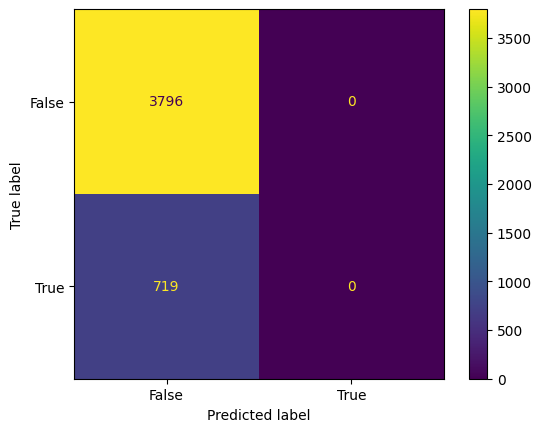

In [25]:
naiveB_cm = metrics.confusion_matrix(y_test, naiveBpred)
naiveB_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = naiveB_cm, display_labels = [False, True])

naiveB_cm_display.plot()
plt.show()

In [ ]:
naiveB_params = {'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]}

naiveB_gridcv_model = GridSearchCV(estimator=naiveB_model, param_grid=naiveB_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)
print("best params of SVM grid search model: {}".format(naiveB_gridcv_model.best_params_))
print('svm gridcv model accuracy score = {}'.format(naiveB_gridcv_model.best_score_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
best params of SVM grid search model: {'var_smoothing': 1e-09}
svm gridcv model accuracy score = 0.8419070804018606


In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier().fit(X_train,y_train)
knn_pred = knn_model.predict(X_Test)

print("KNeighborsClassifier Accuracy Rate: ", accuracy_score(y_test, knn_pred)*100)
print("KNeighborsClassifier Precision Rate: ", precision_score(y_test, knn_pred)*100)
print("KNeighborsClassifier Recall Rate: ", recall_score(y_test, knn_pred)*100)
print("KNeighborsClassifier F1 Score Rate: ", f1_score(y_test, knn_pred)*100)

KNeighborsClassifier Accuracy Rate:  82.19269102990033
KNeighborsClassifier Precision Rate:  18.51851851851852
KNeighborsClassifier Recall Rate:  3.477051460361613
KNeighborsClassifier F1 Score Rate:  5.854800936768149


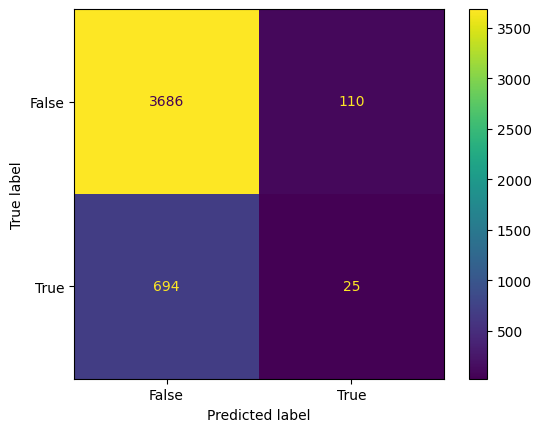

In [27]:
knn_cm = metrics.confusion_matrix(y_test, knn_pred)
knn_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = knn_cm, display_labels = [False, True])

knn_cm_display.plot()
plt.show()

In [ ]:
knn_params = {'n_neighbors': [3, 5, 7], 'metric': ['euclidean', 'manhattan']}

knn_gridcv_model = GridSearchCV(estimator=knn_model, param_grid=knn_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)
print("best params of KNN grid search model: {}".format(knn_gridcv_model.best_params_))
print('svm gridcv model accuracy score = {}'.format(knn_gridcv_model.best_score_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
best params of KNN grid search model: {'metric': 'manhattan', 'n_neighbors': 7}
svm gridcv model accuracy score = 0.8311091708520753


In [28]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression().fit(X_train, y_train)
LR_pred = LR_model.predict(X_Test)

print("LogisticRegression Accuracy Rate: ", accuracy_score(y_test, LR_pred)*100)
print("LogisticRegression Precision Rate: ", precision_score(y_test, LR_pred)*100)
print("LogisticRegression Recall Rate: ", recall_score(y_test, LR_pred)*100)
print("LogisticRegression F1 Score Rate: ", f1_score(y_test, LR_pred)*100)

LogisticRegression Accuracy Rate:  84.07530454042082
LogisticRegression Precision Rate:  0.0
LogisticRegression Recall Rate:  0.0
LogisticRegression F1 Score Rate:  0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


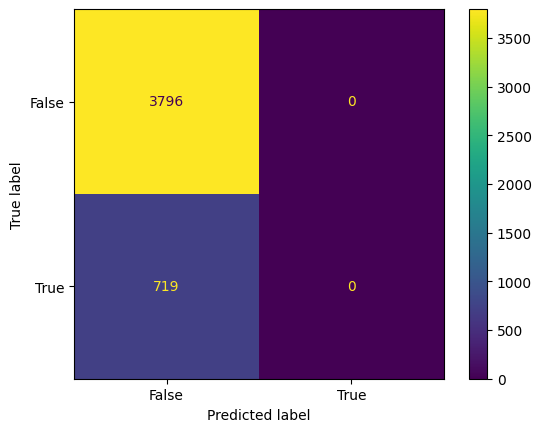

In [29]:
LR_cm = metrics.confusion_matrix(y_test, LR_pred)
LR_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = LR_cm, display_labels = [False, True])

LR_cm_display.plot()
plt.show()

In [ ]:
LR_params = {"C": [0.001, 0.01, 0.1, 1, 10, 100], "penalty": ['l2', 'none'] }

LR_gridcv_model = GridSearchCV(estimator=LR_model, param_grid=LR_params, cv=5, scoring='accuracy', n_jobs=-1, error_score='raise', verbose=2).fit(X_train,y_train)
print("best params of logistic regression grid search model: {}".format(LR_gridcv_model.best_params_))
print('svm gridcv model accuracy score = {}'.format(LR_gridcv_model.best_score_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
best params of logistic regression grid search model: {'C': 0.001, 'penalty': 'l2'}
svm gridcv model accuracy score = 0.8419070804018606


In [30]:
from sklearn.neural_network import MLPClassifier

Mlp_model = MLPClassifier().fit(X_train, y_train)
Mlp_pred = Mlp_model.predict(X_Test)

print("MLPClassifier Accuracy Rate: ", accuracy_score(y_test, Mlp_pred)*100)
print("MLPClassifier Precision Rate: ", precision_score(y_test, Mlp_pred)*100)
print("MLPClassifier Recall Rate: ", recall_score(y_test, Mlp_pred)*100)
print("MLPClassifier F1 Score Rate: ", f1_score(y_test, Mlp_pred)*100)

MLPClassifier Accuracy Rate:  84.07530454042082
MLPClassifier Precision Rate:  0.0
MLPClassifier Recall Rate:  0.0
MLPClassifier F1 Score Rate:  0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


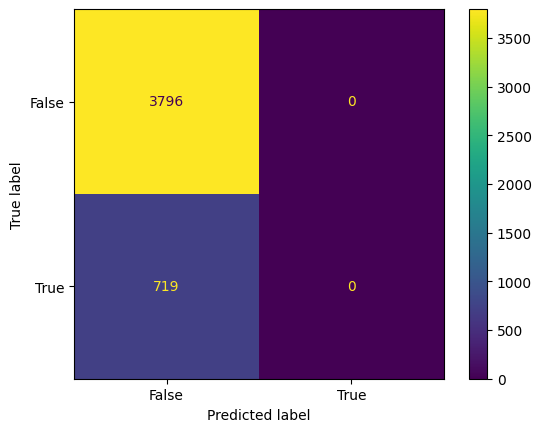

In [31]:
Mlp_cm = metrics.confusion_matrix(y_test, Mlp_pred)
Mlp_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = Mlp_cm, display_labels = [False, True])

Mlp_cm_display.plot()
plt.show()

In [ ]:
Mlp_params = {
    "hidden_layer_sizes": [(10,), (50,), (100,)],
    "activation": ['logistic', 'tanh', 'relu'],
    "alpha": [0.001, 0.01, 0.1],
    "learning_rate": ['constant', 'adaptive']
}

Mlp_gridcv_model = GridSearchCV(estimator=Mlp_model, param_grid=Mlp_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)
print("best params of mlp classifier grid search model: {}".format(Mlp_gridcv_model.best_params_))
print('svm gridcv model accuracy score = {}'.format(Mlp_gridcv_model.best_score_))